# Исследование надёжности заёмщиков

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

**Сформулируем и ответим на следующие вопросы**
- Есть ли зависимость между наличием детей и возвратом кредита в срок?
- Есть ли зависимость между семейным положением и возвратом кредита в срок?
- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
- Как разные цели кредита влияют на его возврат в срок?

Результаты исследования будут учтены при построении модели **кредитного скоринга** — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-предобработка-данных" data-toc-modified-id="Загрузка-и-предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и предобработка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков-и-крайних-значений" data-toc-modified-id="Обработка-пропусков-и-крайних-значений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков и крайних значений</a></span></li><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Лемматизация" data-toc-modified-id="Лемматизация-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Лемматизация</a></span></li><li><span><a href="#Категоризация-данных" data-toc-modified-id="Категоризация-данных-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Категоризация данных</a></span></li></ul></li><li><span><a href="#Ответим-на-вопросы-исследования." data-toc-modified-id="Ответим-на-вопросы-исследования.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Ответим на вопросы исследования.</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Загрузка и предобработка данных

In [26]:
import pandas as pd
from pymystem3 import Mystem

In [27]:
f_scoring = pd.read_csv('')
f_scoring.info()
display(f_scoring)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,343937.404131,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,-2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,-3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


**Поиск аномальных значений**

In [28]:
f_scoring['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75], dtype=int64)

In [29]:
f_scoring['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [30]:
f_scoring['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

* Пропуски в столбцах days_employed, total_income
* В столбце days_employed встречаются отрицательные значения, выбросы значений в разы превосходящие возможные
* В столбце education встречается разный регистр
* В столбцах days_epmloyed, total_income лишняя точность, мешает восприятию данных.
* В столбцах 'dob_years', 'gender', 'children' обнаружены аномальные значения.

# Вывод
* Нужна предобработка

## Предобработка данных

### Обработка пропусков и крайних значений

**Посчитаем количество аномальных значений в 'dob_years' & 'gendre'**

In [31]:
f_scoring[f_scoring['dob_years'] == 0].count()

children            101
days_employed        91
dob_years           101
education           101
education_id        101
family_status       101
family_status_id    101
gender              101
income_type         101
debt                101
total_income         91
purpose             101
dtype: int64

In [32]:
f_scoring[f_scoring['gender'] == 'XNA'].count()

children            1
days_employed       1
dob_years           1
education           1
education_id        1
family_status       1
family_status_id    1
gender              1
income_type         1
debt                1
total_income        1
purpose             1
dtype: int64

In [33]:
f_scoring[f_scoring['children'] == 20].count()

children            76
days_employed       67
dob_years           76
education           76
education_id        76
family_status       76
family_status_id    76
gender              76
income_type         76
debt                76
total_income        67
purpose             76
dtype: int64

Количество значений невелико, принебрегём ими оставив в таком виде.

**Заменим отрицательные значения, на значения по модулю.**

In [34]:
f_scoring['days_employed'] = abs(f_scoring['days_employed'])

**Посчитаем заведомо неприемлемые значения, примем за границу количество дней которые человек работает с 18 до 62,5 лет**

In [35]:
f_scoring[f_scoring['days_employed'] > 16242].count()

children            3449
days_employed       3449
dob_years           3449
education           3449
education_id        3449
family_status       3449
family_status_id    3449
gender              3449
income_type         3449
debt                3449
total_income        3449
purpose             3449
dtype: int64

* больше 15%, удаление не подходит, обработаем эти значения
* изучив таблицу предположим, что указанные значения это отклонения от истинных на два порядка, приведем их к прежнему виду.


In [36]:
f_scoring.loc[(f_scoring['days_employed'] > 16242), 'days_employed'] = f_scoring['days_employed']/100

**Проверка**

In [37]:
f_scoring[f_scoring['days_employed'] > 16242].count()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

In [38]:
display(f_scoring)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,3402.660720,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,среднее,1,гражданский брак,1,F,компаньон,0,224791.862382,операции с жильем
21521,0,3439.374041,67,среднее,1,женат / замужем,0,F,пенсионер,0,155999.806512,сделка с автомобилем
21522,1,2113.346888,38,среднее,1,гражданский брак,1,M,сотрудник,1,89672.561153,недвижимость
21523,3,3112.481705,38,среднее,1,женат / замужем,0,M,сотрудник,1,244093.050500,на покупку своего автомобиля


**Посчитаем пропуски**

In [39]:
f_scoring.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

 **Заменим значения на медианное**

In [40]:
f_scoring['days_employed'] = f_scoring['days_employed'].fillna(f_scoring['days_employed'].median())

In [41]:
f_scoring['total_income'] = f_scoring['total_income'].fillna(f_scoring['total_income'].median())

**Проверка**

In [42]:
f_scoring.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

# Вывод

10% процентов пропусков это много для удаления, данные числовые, поэтому заменили пропуски на медиану, предварительно уменьшив влияние крайних значений.Пропуски возникли в столбцах без которых кредиты не выдают,а если выдают то это кредиты по двум документам, т.о. самое вероятное это кредиты выданные по двум документам.

### Замена типа данных

**Заменим вещественный тип на целый**

In [43]:
f_scoring['days_employed'] = f_scoring['days_employed'].astype('int')

In [44]:
f_scoring['total_income'] = f_scoring['total_income'].astype('int')

**Проверка**

In [45]:
f_scoring.dtypes

children             int64
days_employed        int32
dob_years            int64
education           object
education_id         int64
family_status       object
family_status_id     int64
gender              object
income_type         object
debt                 int64
total_income         int32
purpose             object
dtype: object

**Приведем к нижнему регистру**

In [46]:
f_scoring['education'] = f_scoring['education'].str.lower()

# Вывод

Мы молодцы, отлично заменили вещественные данные на целочисленные, приведя логику и восприятие в порядок, привели строки в колонке к нижнему регистру.

### Обработка дубликатов

**Узнаем размер таблицы до изменений**

In [47]:
f_scoring.shape

(21525, 12)

**Поиск дубликатов**

In [48]:
f_scoring.duplicated().sum()

71

**Сохраним чистую таблицу в новой переменной удалив дубликаты**

In [49]:
f_scoring_clear = f_scoring.drop_duplicates().reset_index(drop=True)

**Проверка**

In [50]:
f_scoring_clear.duplicated().sum()

0

**Размер после изменений всё сработало коректно**

In [51]:
f_scoring_clear.shape

(21454, 12)

# Вывод

Дубликаты удалены.

### Лемматизация

**Вернём список уникальных значений**

In [52]:
text = f_scoring_clear['purpose'].unique()
print(text)

['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться высшим образованием']


**Выделим леммы, посчитаем по частоте упоминания**

In [53]:
m = Mystem()
from collections import Counter
lemmas = m.lemmatize(" ".join([str(_) for _ in text]))
print(Counter(lemmas))



Counter({' ': 96, 'покупка': 10, 'недвижимость': 10, 'автомобиль': 9, 'образование': 9, 'жилье': 7, 'с': 5, 'операция': 4, 'на': 4, 'свой': 4, 'свадьба': 3, 'строительство': 3, 'получение': 3, 'высокий': 3, 'дополнительный': 2, 'для': 2, 'коммерческий': 2, 'жилой': 2, 'подержать': 2, 'заниматься': 2, 'сделка': 2, 'приобретение': 1, 'сыграть': 1, 'проведение': 1, 'семья': 1, 'собственный': 1, 'со': 1, 'профильный': 1, 'сдача': 1, 'ремонт': 1, '\n': 1})


# Вывод <a id='lemma'></a>

В целях категоризации выделим четыре категории по ключям в словах
* realty - ['недвижимост', 'жил']
* wedding - ['свадьб']
* avto - ['авто']
* education ['образован']

### Категоризация данных

###### Дети

**Разобьем на группы по количеству детей 0,1,2,3 и больше.**

In [54]:
def cat_child(children):
    if children == 0:
        return 'нет детей'
    if children == 1:
        return 'один ребёнок'
    if children == 2:
        return 'два ребенка'
    return 'многодетная'
f_scoring_clear['cat_child'] = f_scoring['children'].apply(cat_child)
f_scoring_clear.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,cat_child
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,один ребёнок
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,один ребёнок
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,нет детей
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,многодетная
4,0,3402,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,нет детей


In [55]:
f_scoring_clear.groupby('cat_child')['debt'].sum().reset_index()

,cat_child,debt
0,два ребенка,162
1,многодетная,44
2,нет детей,1141
3,один ребёнок,394


# Семейное положение

In [56]:
family_log = f_scoring_clear[['debt','family_status']]
print(family_log.head())
famaly_dict = f_scoring_clear[['family_status','family_status_id']]
famaly_dict = famaly_dict.drop_duplicates().reset_index(drop=True)
print(famaly_dict.head())


   debt     family_status
0     0   женат / замужем
1     0   женат / замужем
2     0   женат / замужем
3     0   женат / замужем
4     0  гражданский брак
           family_status  family_status_id
0        женат / замужем                 0
1       гражданский брак                 1
2         вдовец / вдова                 2
3              в разводе                 3
4  Не женат / не замужем                 4


In [57]:
print(family_log.groupby('family_status').sum().sort_values(by='debt',ascending=False).head())

                       debt
family_status              
женат / замужем         931
гражданский брак        388
Не женат / не замужем   274
в разводе                85
вдовец / вдова           63


# Уровень дохода

* **Разобьём общий доход на терцили**

In [58]:
income_labels = ['low_income', 'medium_incom', 'high_income']
f_scoring_clear['level_income'] = pd.qcut(f_scoring['total_income'], q=3, labels=income_labels)
f_scoring_clear.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,cat_child,level_income
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,один ребёнок,high_income
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,один ребёнок,low_income
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,нет детей,medium_incom
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,многодетная,high_income
4,0,3402,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,нет детей,medium_incom


In [59]:
f_scoring_clear.groupby('level_income')['debt'].sum().reset_index()

,level_income,debt
0,low_income,551
1,medium_incom,624
2,high_income,566


# Цели кредита

* **Возьмём ключи из [лемматизации](#lemma)**

In [60]:
def cat_purpose(purpose):
    if (('недвижимост') or ('жил')) in purpose:
        return 'realty'
    if 'авто' in purpose:
        return 'avto'
    if 'образован' in purpose:
        return 'education'
    return 'wedding'
 
f_scoring_clear['cat_purpose'] = f_scoring_clear['purpose'].apply(cat_purpose)
f_scoring_clear.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,cat_child,level_income,cat_purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,один ребёнок,high_income,wedding
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,один ребёнок,low_income,avto
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,нет детей,medium_incom,wedding
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,многодетная,high_income,education
4,0,3402,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,нет детей,medium_incom,wedding


In [61]:
f_scoring_clear.groupby('cat_purpose')['debt'].sum().reset_index()

,cat_purpose,debt
0,avto,403
1,education,370
2,realty,474
3,wedding,494


**Вывод**

Провели категоризацию по трем признакам.

## Ответим на вопросы исследования.

**Есть ли зависимость между наличием детей и возвратом кредита в срок?**

<AxesSubplot:xlabel='cat_child', ylabel='debt'>

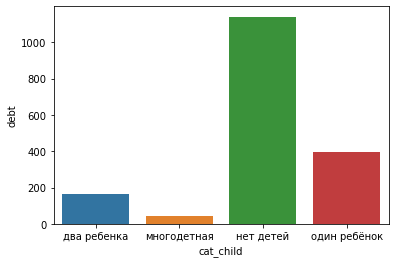

In [62]:
import seaborn as sns
sns.barplot(x='cat_child', y='debt', data=f_scoring_clear.groupby('cat_child')['debt'].sum().reset_index())

**Вывод**

Да есть. В семьях без детей не возвращают кредит в 26,6 раз чаще, чем в многодетных семьях, в 5,5 раз чаще чем в семье с двумя детьми и в 2,6 раза чаще чем в семьях с одним ребенком.

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [63]:
print(family_log.groupby('family_status').sum().sort_values(by='debt',ascending=False).head())

                       debt
family_status              
женат / замужем         931
гражданский брак        388
Не женат / не замужем   274
в разводе                85
вдовец / вдова           63


**Вывод**

Да женатые/замужнии склонны не возвращать кредиты в 2,4 раза чаще чем в гражданском браке...

**Есть ли зависимость между уровнем дохода и возвратом кредита в срок?**

<AxesSubplot:xlabel='level_income', ylabel='debt'>

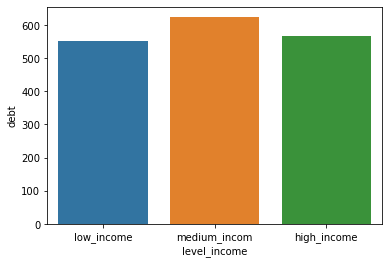

In [64]:
sns.barplot(x='level_income', y='debt', data=f_scoring_clear.groupby('level_income')['debt'].sum().reset_index())

**Вывод**

Зависимость минимальна, значения изменяются в пределах 0,0025 от выборки.

**Как разные цели кредита влияют на его возврат в срок?**

<AxesSubplot:xlabel='cat_purpose', ylabel='debt'>

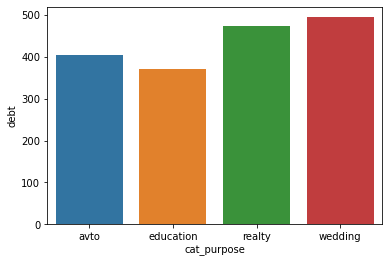

In [65]:
sns.barplot(x='cat_purpose', y='debt', data=f_scoring_clear.groupby('cat_purpose')['debt'].sum().reset_index())

**Вывод**

Цели кредита не влияют на уровень не возврата, который составляет пять из тысячи.

## Общий вывод

Проанализировав исходные данные я пришел к следущим выводам.

В части полонты и достоверности сведений есть проблемы технического/логического плана в выгружаемых 
столбцах в порядке возрастания по важности:
* 'gendre' - единичная некоректная запись
* 'education' - используется разный регистр
* 'total_income' - неверный формат поменять с float64 на int, пропуски предположительно из-за кредитов по двум документам
* 'days_employed' - неверный формат поменять с float64 на int, пропуски предположительно из-за кредитов по двум документам,
  15% значений отличаются на два порядка от оригинальных.
###### рекомендации - согласовать форму выгрузки

После преобработки данных лемматизировал строковые значения для категоризации целей кридитования и выявления закономерностей
согласно поступившим запросам. Исследовав категоризованные данные, сгрупировал их по искомым целям и ответил на вопросы поставленные перед исследованием.

*  Есть ли зависимость между наличием детей и возвратом кредита в срок?
  
   Да есть. В семьях без детей не возвращают кредит в 26,6 раз чаще, чем в многодетных семьях, в 5,5 раз чаще чем в семье с        двумя детьми и в 2,6 раза чаще чем в семьях с одним ребенком.
   
  
*  Есть ли зависимость между семейным положением и возвратом кредита в срок?
  
   Да женатые/замужнии склонны не возвращать кредиты в 2,4 раза чаще чем в гражданском браке.
   
  
*  Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

   Зависимость минимальна, значения изменяются в пределах 0,0025 от выборки.
   
  
*  Как разные цели кредита влияют на его возврат в срок?

   Цели кредита минимально влияют на уровень не возврата, который составляет пять из тысячи.
###### Вывод - применить полученые данные в скоринг системе